In [52]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

data_path = '/workspaces/Final-Year-Project/Cleaned Data/TrainTestData.csv'
df = pd.read_csv(data_path)

X = df.drop('Diabetes Status', axis=1)
y = df['Diabetes Status']

scaler = StandardScaler()
X = scaler.fit_transform(X)

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced']  # Add class weight as an option
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=kf, n_jobs=-1, verbose=1)

grid_search.fit(X, y)

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X)

print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Mean Accuracy with Best Parameters:", grid_search.best_score_)


print("Decision Tree Classification Report:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters for Decision Tree: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Accuracy with Best Parameters: 0.5375324906533737
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       679
           1       0.51      0.45      0.48       688
           2       0.64      0.70      0.67       685

    accuracy                           0.61      2052
   macro avg       0.61      0.61      0.61      2052
weighted avg       0.60      0.61      0.61      2052

Confusion Matrix:
[[464 147  68]
 [173 309 206]
 [ 60 146 479]]


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters for Decision Tree: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Accuracy with Best Parameters: 0.5276299395848516

Decision Tree Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       688
           1       0.54      0.39      0.45       688
           2       0.65      0.73      0.69       688

    accuracy                           0.61      2064
   macro avg       0.61      0.61      0.60      2064
weighted avg       0.61      0.61      0.60      2064

Confusion Matrix on Resampled Data:
[[502 112  74]
 [229 266 193]
 [ 73 114 501]]


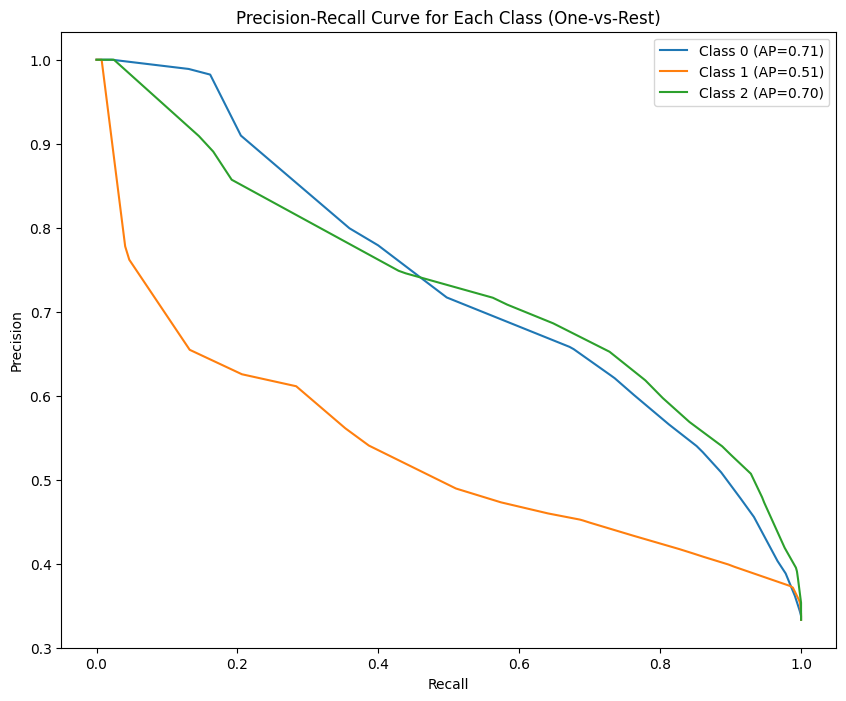

In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE  # Import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/workspaces/Final-Year-Project/Cleaned Data/TrainTestData.csv'
df = pd.read_csv(data_path)

# Define features and target directly from the dataset
X = df.drop('Diabetes Status', axis=1)
y = df['Diabetes Status']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data to balance the class distribution
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Set up the hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced']
}

# Use GridSearchCV with KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=kf, n_jobs=-1, verbose=1)

# Fit GridSearchCV on the resampled data (after SMOTE)
grid_search.fit(X_resampled, y_resampled)

# Get the best model
best_dt = grid_search.best_estimator_

# Evaluate the model with the best parameters on the resampled data
y_pred = best_dt.predict(X_resampled)
y_pred_proba = best_dt.predict_proba(X_resampled)  # Get predicted probabilities

# Print the best hyperparameters and the mean accuracy from cross-validation
print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Mean Accuracy with Best Parameters:", grid_search.best_score_)

# Classification report and confusion matrix
print("\nDecision Tree Classification Report on Resampled Data:")
print(classification_report(y_resampled, y_pred))
print("Confusion Matrix on Resampled Data:")
print(confusion_matrix(y_resampled, y_pred))

# **Precision-Recall Curve for each class (One-vs-Rest)**
n_classes = len(np.unique(y_resampled))

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_resampled == i, y_pred_proba[:, i])  # One-vs-Rest
    average_precision = average_precision_score(y_resampled == i, y_pred_proba[:, i])  # Calculate average precision
    plt.plot(recall, precision, label=f'Class {i} (AP={average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class (One-vs-Rest)')
plt.legend(loc='best')
plt.show()
